# Answer to Assignment 1

## Question 1

A credit card company wants to divide its users into different segments. The dataset (“Q1 CreditCardBehavior.csv”) contains the credit card usage and payment data of 6,622 consumers in the past six months. Below is the description of the variables.
- CUST_ID: Identification of Credit Card holder
- BALANCE: Account balance at the end of the six months
- PURCHASES: Amount of purchases made from account in the past six months
- PURCHASES_TRX: Number of purchase transactions made in the past six months
- CREDIT_LIMIT: Credit limit for user
- PAYMENTS: Amount of card payment made by user in the past six months
- PRC_FULL_PAYMENT: Percent of full payment paid by user in the past six months

Use clustering analysis to divide the consumers into four segments. 

In [7]:
# import packages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans    # Use "sklearn/cluster/KMeans" for clustering analysis
from matplotlib import pyplot as plt

In [8]:
# load and normalize data
url1 = "https://raw.githubusercontent.com/zoutianxin1992/MarketingAnalyticsPython/main/Marketing%20Analytics%20in%20Python/2022/assignment%201/dataset/Q1_CreditCardBehavior.csv"
df = pd.read_csv(url1,index_col=0) # use the first column (customer id) as index
df_normalized = (df-df.min())/(df.max()-df.min())  # By default, pandas calculate maximums and minimums by columns, which serves our purpose.
df_normalized.describe()    # For both transformed variables, the minimum will be zero, and the maximum will be one.

,BALANCE,PURCHASES,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
count,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000
mean,0.074550,0.026630,0.055326,0.151648,0.038597,0.191630
std,0.108915,0.048715,0.075730,0.125535,0.064061,0.320648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004705,0.004616,0.016760,0.054020,0.008781,0.000000
50%,0.032457,0.012027,0.033520,0.112228,0.019828,0.000000
75%,0.094523,0.030164,0.067039,0.212730,0.042906,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Runs the k-mean algorithm to segment consumers into three segments
kmeanSpec = KMeans(n_clusters = 4, n_init = 100)  # setup the k-mean model specs
kmean_result = kmeanSpec.fit(df_normalized)    # apply the above model to the normalized data and store the result
df["segment"] = kmean_result.labels_ 


### (1) Explain why data normalization is needed before running the clustering analysis.

See slides.

### (2)How many consumers are there in each segment? In which segment did an average consumer in that segment make the most purchase in dollars with the credit card in the past six months? Which segment in total made the most purchase in dollars with the credit card in the past six months?

In [10]:
# summarize  variables
   
summary_table = df.groupby("segment").aggregate({
    "BALANCE":["mean"],
    "PURCHASES":["mean"],       
    "PURCHASES_TRX":["mean"],
    "CREDIT_LIMIT":["mean"],  
    "PAYMENTS":["mean"],
    "PRC_FULL_PAYMENT":["mean"],  
    "segment": "count"                                   
}
)
summary_table

,BALANCE,PURCHASES,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,segment
,mean,mean,mean,mean,mean,mean,count
segment,,,,,,,
0,200.558928,2104.621614,26.532909,5258.625909,2258.861006,0.895413,942
1,4780.617787,2633.461639,35.759964,9743.161232,3923.388037,0.016178,1104
2,209.092067,1245.117967,17.935606,4279.958678,1624.478019,0.403208,792
3,965.641989,817.660817,13.869450,3136.695042,1083.101543,0.023334,3784


- Number of consumers of each segment: 792, 3784, 1104, 942 <br>
- An average consumer in segment 2 makes the most purchase (2633 dollar). 
- Segment 1 spent the most in total (817 * 3784 = 3.09M dollars). Seg0: 1245 * 792 = 0.99M Seg2: 2633 * 1104 = 2.91M, Seg3: 2104 * 942 = 1.98M

### (3)	How many dollars does an average consumer in each segment spend per transaction on average?

Seg 0: 1245.11/17.93 = 69.44
Seg 1: 817.66/13.87 = 58.95
Seg 2: 2642.01/35.93 = 73.64
Seg 3: 2104.62/26.53 = 79.32

### (4) Describe in word the unique characteristics of each segment that distinguishes it from other segments? Can you give a name for each segment (e.g., Microsoft named Xbox player segments as contenders, experts, etc.)? 

|Segment name | characteristics | Name|
|---|---|---|
|Seg 0 | low balance, medium spending, medium full-payment rate | frugal spenders|
|Seg 1 | low spending, low transaction frequency, low full-payment rate, constitute majority of consumers | casual users|
|Seg 2 | high spending, high spending frequency, high balance | premium shoppers|
|Seg 3 | low balance, high spending, high credit limit, high full-payment rate | credit builders|

### (5)	Is dividing consumers into four segments a reasonable choice? Why? 

Text(0.5, 0, 'number of clusters')

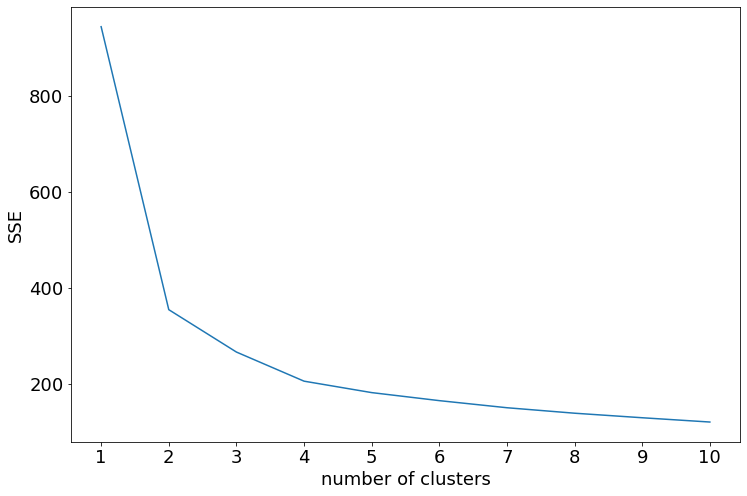

In [11]:
%matplotlib inline
K = 10  # K is the maximum number of clusters we will check
store_SSE = np.zeros(K)    # create a vector to store SSE's. The k-th entry will be the SSE with k clusters.

for k in range(1, K+1):                                   # try k from 1 to K  
    kmeanSpec = KMeans(n_clusters = k, n_init = 10)                        # set up k-mean model with k clusters
    kmean_result = kmeanSpec.fit(df_normalized)               # run k-mean on normalized data
    store_SSE[k-1] = kmeanSpec.inertia_                       # store the SSE (.inertia_) in the k-th entry of store_SSE

plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(1, K+1), store_SSE)        
plt.xticks(range(1, K+1), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("SSE",fontsize = 18)
plt.xlabel("number of clusters", fontsize = 18)

Four segments is not a bad choice, but two segments is better.

## Question 2

Roblox is a popular online gaming platform, where users can create their own games and play those created by other peer users. Dataset “Q2-RobloxTotalUsers.csv” records the total number of Roblox users (in millions) since its launch in 2016.  The data are bi-annual and have 11 periods. 

In [12]:
from scipy.optimize import least_squares                 # package to conduct Nonlinear least square 

# import historical data 
url2 = "https://raw.githubusercontent.com/zoutianxin1992/MarketingAnalyticsPython/main/Marketing%20Analytics%20in%20Python/2022/assignment%201/dataset/Q2-RobloxTotalUsers.csv"
df2 = pd.read_csv(url2, index_col=0) 
# rename variables and create "t" variable
df2.rename(columns = {"Users":"A","Period":"t"} , inplace = True)  
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2016_1H to 2021_1H
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   t       11 non-null     int64
 1   A       11 non-null     int64
dtypes: int64(2)
memory usage: 264.0+ bytes


In [13]:
# calculate "N" from "A"
df2["N"] = df2["A"].diff()
# alternative code to calculate "N"
    # df2["A-1"]=df2["A"].shift(1)
    # df2["A-1"].iat[0] = 0
    # df2["N"] = df2["A"]-df2["A-1"]
    
# N(1) is currently NaN, so we need to mannually set its value to A(1)
df2["N"].iat[0] = df2["A"].iat[0]
df2.head(4)

,t,A,N
Year,,,
2016_1H,1,9,9.0
2016_2H,2,20,11.0
2017_1H,3,36,16.0
2017_2H,4,46,10.0


In [14]:
# define A_hat(t) and N_hat(t)

def A_hat(t,p,q,M):  #t: time, params: the 1*3 array for (p,q,M)
    return M * (1 - np.exp(-(p+q)*t))/(1 + q / p* np.exp(-(p+q)*t))

# define N_hat(t) 
def N_hat(t,p,q,M):  
    return A_hat(t,p,q,M) - A_hat(t-1,p,q,M)  # We can use the A_hat function to calculate N_hat instead of manually typing the formula

In [15]:
# define prediction errors as a fucntion of p,q,M
T = len(df2["N"])   # number of periods for historical data

def prediction_error(params):   # Note that we input p,q,M as a 1*3 array "params." This is required by Python's NLS solver we will use. 
    p = params[0]
    q = params[1]
    M = params[2]
    Nhat = [N_hat(t,p,q,M) for t in range(1,T+1)]            # Given p,q,M, generate Bass prediction for each period
    return df2["N"] - Nhat                                 # The output is an array of prediction error for each period

In [16]:
# estimate p,q,M using least_squares
# Bass model requires 0<p<1, 0<q<1, M>0, so we need to add the constraints
A_t = df2['N'].iat[T-1]          # calculate already adopters until period t
params0 = [0.01,0.16,3*A_t]  # initial guess for p,q,M. Required by least_squares
estim_results= least_squares(prediction_error, params0, bounds = (0,np.Inf) )

In [17]:
# store the estimation results
p_estim = estim_results.x[0]
q_estim = estim_results.x[1]
M_estim = estim_results.x[2]
print(p_estim, q_estim, M_estim)

0.009110935867954743 0.18200334245151575 788.8449325631107


### (1) Use Bass model to predict the total number of Roblox users in first half of 2023. 


In [18]:
# January 2023 is the 15th period
A_hat(15,p_estim, q_estim, M_estim)

348.24139211498147

### (2)	Compare the values of p and q for your Bass model. What do you find? Explain how the product nature of Roblox may explain this finding.

$p$ is much smaller than $q$, suggesting that the imitation effect is much stronger than innovation effect for Roblox's diffusion. Roblox exhibits a strong network effect because the number of games available on the platform depends on how many users create games, and the number of creaters in turn depends on how many gamers will play their game.

### (3)	Plot new adoptions of Roblox, N(t), as a function of time for this new product for 30 periods (15 years). Report the total number of adopters at the end of period 30.

In [19]:
T_pred = 30  # number of periods for prediction
predictA = [A_hat(t,p_estim,q_estim,M_estim) for t in range(1,T_pred+1)]  # predict already adopters for T periods
predictN = [N_hat(t,p_estim,q_estim,M_estim) for t in range(1,T_pred+1)]  # predict new adopters for T periods

Text(0.5, 0, 'time')

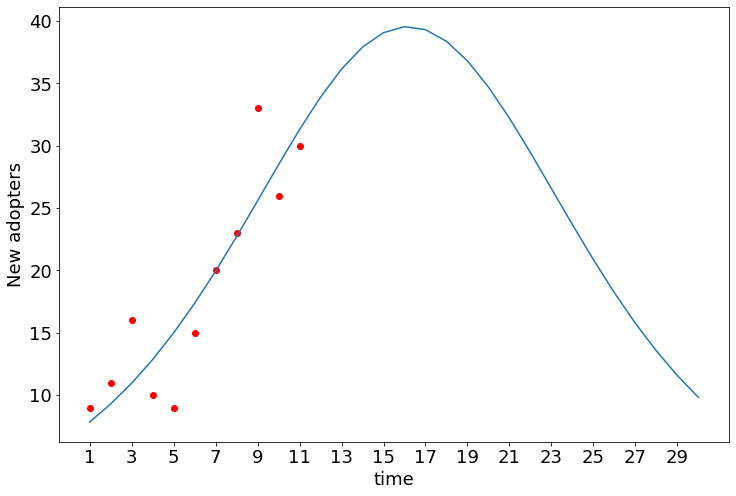

In [20]:
# Plot the trajectory of new adopters

plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(1,T_pred+1),predictN)
plt.scatter(range(1,T+1),df2["N"],color = "red")    # Also plot historical sales data
plt.xticks(range(1,T_pred+1,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("New adopters",fontsize = 18)
plt.xlabel("time", fontsize = 18)

Total adopters at the end of period 30.

In [21]:
A_hat(30,p_estim,q_estim,M_estim)

738.5503075995564

### (4)	When will the total adoptions of Roblox surpass 50% of the total market size? 

In [22]:
halfMarket = M_estim*0.5
# np.where(condition) returns the data indices where "condition" is True 
predictA > halfMarket

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [23]:
np.where(predictA > halfMarket)

(array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       dtype=int64),)

So, the total adoption exceeds 50% of the total market size in period 17 (First half of 2024).